# **Exploratory Data Analysis (EDA) of the Lynx-ID dataset**

In [1]:
# Allow reloading of libraries without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from lynx_id.data.dataset import LynxDataset
from lynx_id.data.collate import collate_single

from pathlib import Path
from tqdm import tqdm
from torch.utils.data import DataLoader

## Load dataset and retrieve csv

In [3]:
DATASET = Path("/gpfsscratch/rech/ads/commun/datasets/extracted/")

In [4]:
full_dataset = LynxDataset(
    dataset_csv=DATASET / "lynx_dataset_full.csv",
    countries=['all'],
    mode='single',
    device='auto',
    verbose=False,
    probabilities=[1, 0, 0]  # only classic images
)

In [5]:
full_df = full_dataset.dataframe

## General informations

In [6]:
print(f"In the dataset, we have {len(full_df)} images of lynx.")

In the dataset, we have 11830 images of lynx.


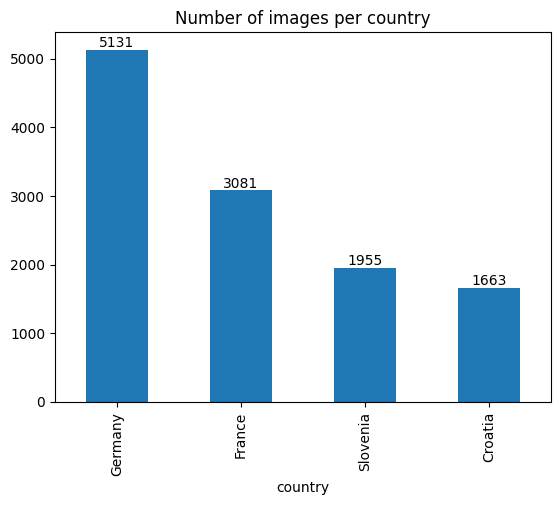

In [7]:
plt.title('Number of images per country')
ax = full_df['country'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

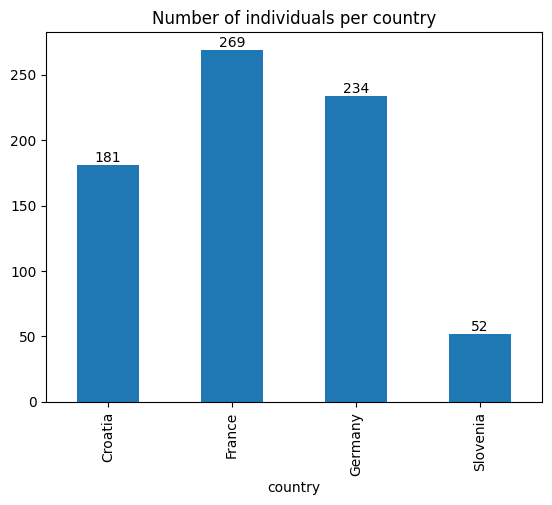

In [8]:
plt.title('Number of individuals per country')
ax = full_df.groupby('country')['lynx_id'].nunique().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

In [9]:
full_df.dtypes

filepath            object
lynx_id             object
source              object
pattern             object
date                object
location            object
image_number         int64
conf               float64
x                  float64
y                  float64
width              float64
height             float64
number_animals     float64
number_children    float64
sex                 object
side                object
latitude           float64
longitude          float64
country             object
filepath_no_bg      object
dtype: object

In [10]:
full_df.describe()

image_number          conf             x             y         width  \
count  11830.000000  11830.000000  11830.000000  11830.000000  11830.000000   
mean      62.781065      0.932524    900.920441    784.608718    830.656169   
std       91.186706      0.065198    867.148712    442.144536    524.971345   
min        1.000000      0.500000      0.000000      0.000000     47.984640   
25%        6.000000      0.926000    291.840000    520.857600    468.992000   
50%       23.000000      0.955000    718.804800    708.933200    727.977600   
75%       75.000000      0.968000   1242.914400    960.851200   1047.961600   
max      472.000000      0.993000   6396.633600   3375.820800   5152.000000   

             height  number_animals  number_children     latitude    longitude  
count  11830.000000          1663.0      1663.000000  3618.000000  3618.000000  
mean     616.612693             1.0         0.002405    31.710985    28.515680  
std      398.412335             0.0         0.048999    15.209406    15.033099  
min       43.994880             1.0         0.000000    14.408113    13.957060  
25%      353.952000             1.0         0.000000    15.207866    14.730940  
50%      518.889600             1.0         0.000000    45.523540    15.090534  
75%      757.800000             1.0         0.000000    45.731675    44.749292  
max     4320.000000             1.0         1.000000    46.437879    45.693027

## NaN

### Columns without NaN

In [11]:
full_df.dropna(axis=1, how='all').columns

Index(['filepath', 'lynx_id', 'source', 'pattern', 'date', 'location',
       'image_number', 'conf', 'x', 'y', 'width', 'height', 'number_animals',
       'number_children', 'sex', 'side', 'latitude', 'longitude', 'country',
       'filepath_no_bg'],
      dtype='object')

### Percentage of NaN values per column

In [12]:
full_df.groupby('country').apply(lambda x: x.drop(columns=["filepath"]).apply(lambda col: col.isna().mean() * 100))

lynx_id  source     pattern        date    location  image_number  \
country                                                                       
Croatia       0.0     0.0  100.000000    0.000000  100.000000           0.0   
France        0.0     0.0    4.089581    0.908796    6.653684           0.0   
Germany       0.0   100.0  100.000000  100.000000  100.000000           0.0   
Slovenia      0.0   100.0  100.000000    0.000000    0.000000           0.0   

          conf    x    y  width  height  number_animals  number_children  \
country                                                                    
Croatia    0.0  0.0  0.0    0.0     0.0             0.0              0.0   
France     0.0  0.0  0.0    0.0     0.0           100.0            100.0   
Germany    0.0  0.0  0.0    0.0     0.0           100.0            100.0   
Slovenia   0.0  0.0  0.0    0.0     0.0           100.0            100.0   

                sex   side  latitude  longitude  country  filepath_no_bg  
country                                                                   
Croatia     0.00000    0.0       0.0        0.0      0.0             0.0  
France    100.00000  100.0     100.0      100.0      0.0             0.0  
Germany   100.00000  100.0     100.0      100.0      0.0             0.0  
Slovenia    2.86445  100.0       0.0        0.0      0.0             0.0

## Sex

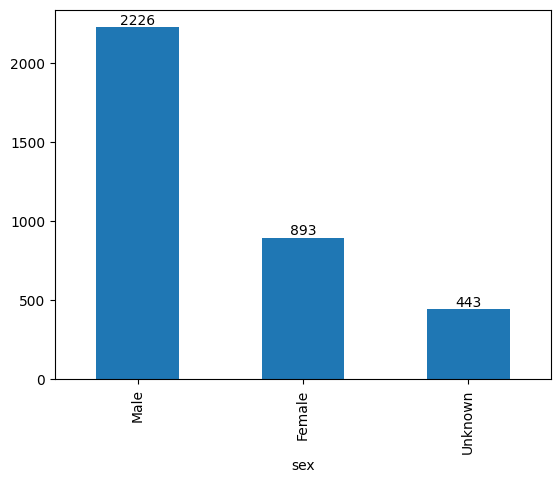

In [13]:
ax = full_df['sex'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

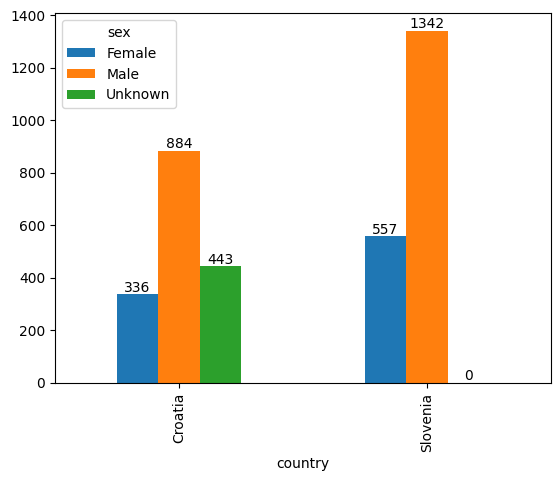

In [14]:
ax = full_df.groupby('country')['sex'].value_counts().unstack().plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)

## Location

In [15]:
location_value_counts = full_df['location'].value_counts()

print(f"There are {len(location_value_counts)} unique locations.")

There are 402 unique locations.


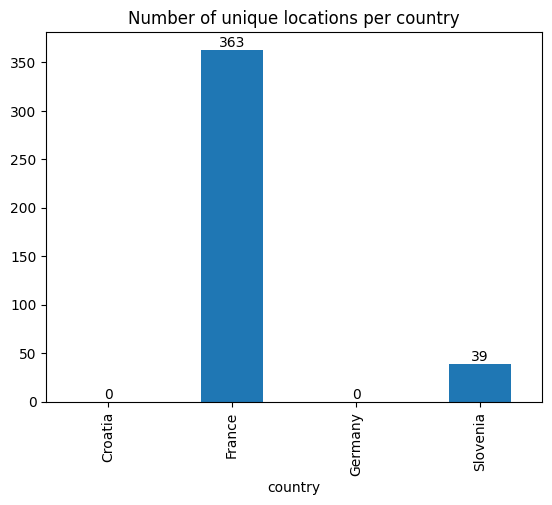

In [16]:
plt.title('Number of unique locations per country')
ax = full_df.groupby('country')['location'].nunique().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

In [17]:
full_df[full_df['country'] == 'France']['location'].value_counts()

location
Syam                        102
Les-Planches-En-Montagne     87
Contrevoz                    75
Les-Combes                   74
Orchamps-Vennes              66
                           ... 
Chenecey-Buillon              1
Saint-Christophe              1
Innimond                      1
Saint-Sorlin                  1
Seythenex                     1
Name: count, Length: 363, dtype: int64

In [18]:
full_df[full_df['country'] == 'Slovenia']['location'].value_counts()

location
LD_Struge                    334
LD_Ribnica                   217
LD_Babno_polje               154
LPN_Jelen                    151
LPN_Sneznik_Kocevska_Reka    137
LD_Loka_pri_Crnomlju         114
LD_Kocevje                   110
LD_Osilnica                   96
LD_Bled                       90
LD_Loz_Stari_trg              81
LD_Loski_Potok                71
LD_Velike_Poljane             60
LPN_Triglav                   52
LD_Draga                      47
LPN_Medved                    39
LD_Iga_vas                    36
LD_Predgrad                   30
LPN_Ljubljanski_vrh           24
LD_Stari_trg                  21
LD_Col                        20
LD_Mokrc                      16
LD_Suha_Krajina               10
LPN_Zitna_gora                 9
LD_Rakek                       9
LD_Dolenja_vas                 6
LD_Banja_Loka                  5
LD_Jelovica                    3
LD_Bohinjska_Bistrica          2
LD_Bukovje                     1
LD_Crnomelj                    1
L

### Number of images per pattern

In [19]:
full_df["pattern"].value_counts()

pattern
OCELLES    2227
SPOTS       728
Name: count, dtype: int64

## Number of images per individuals

In [20]:
nb_images_per_individuals = full_df["lynx_id"].value_counts()

print(f"{len(nb_images_per_individuals)} unique individuals")

735 unique individuals


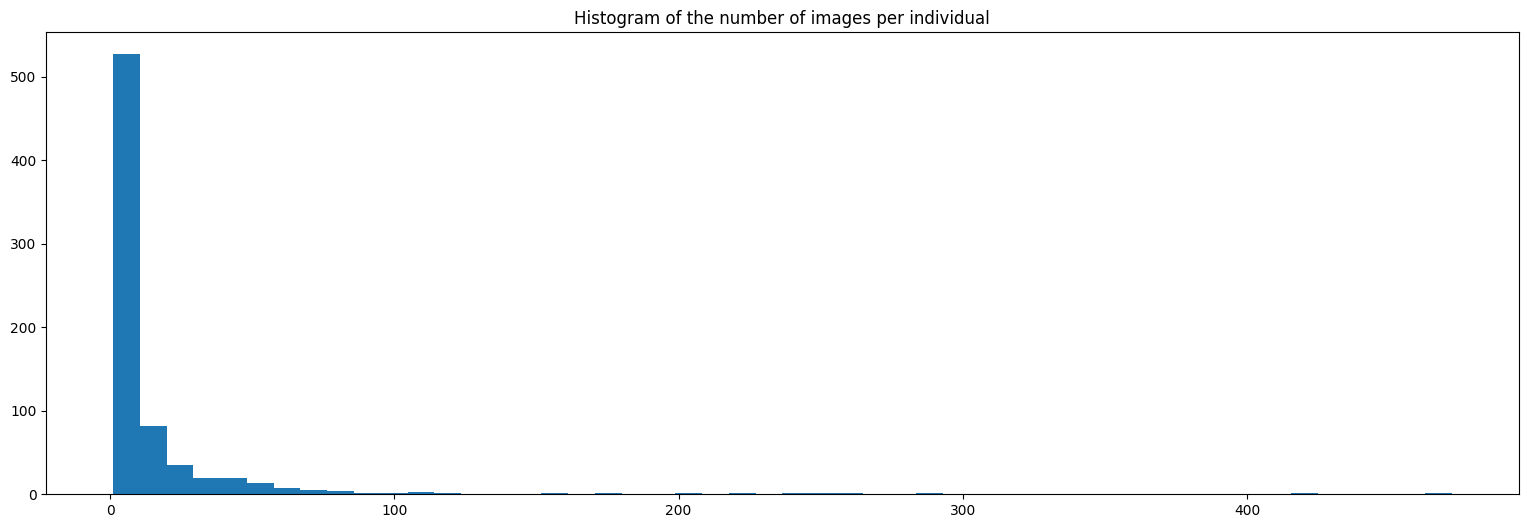

In [21]:
plt.figure(figsize=(19, 6))
plt.hist(nb_images_per_individuals, bins=50)
plt.title("Histogram of the number of images per individual")
plt.show()

In [22]:
print(f"On average, there are {np.mean(nb_images_per_individuals)} images per individual")

On average, there are 16.095238095238095 images per individual


In [23]:
print(f"{len(nb_images_per_individuals[nb_images_per_individuals < 3])} individuals have less than 3 images")

233 individuals have less than 3 images


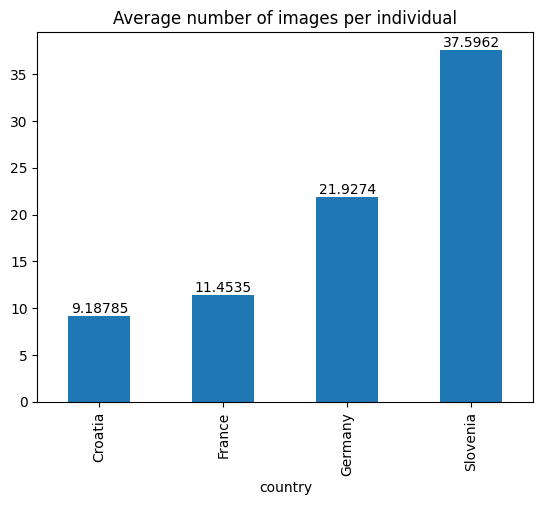

In [24]:
plt.title("Average number of images per individual")
ax = full_df.groupby('country')['lynx_id'].value_counts().groupby('country').mean().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

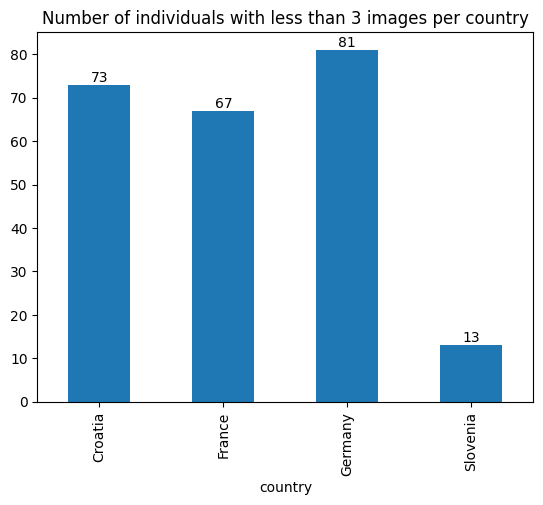

In [25]:
plt.title("Number of individuals with less than 3 images per country")
ax = (full_df.groupby('country')['lynx_id'].value_counts() < 3).groupby('country').sum().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

## Date

In [26]:
countries_with_all_dates_nan = full_df.groupby('country')['date'].apply(lambda x: x.isna().all())
countries_with_all_dates_nan

country
Croatia     False
France      False
Germany      True
Slovenia    False
Name: date, dtype: bool

In [27]:
full_df["date"] = pd.to_datetime(full_df["date"], format='ISO8601')

In [28]:
oldest_date = full_df["date"].min()
latest_date = full_df["date"].max()

print(f"Oldest date: {oldest_date}")
print(f"Latest date: {latest_date}")

Oldest date: 2006-01-01 00:00:00
Latest date: 2023-11-06 07:19:00


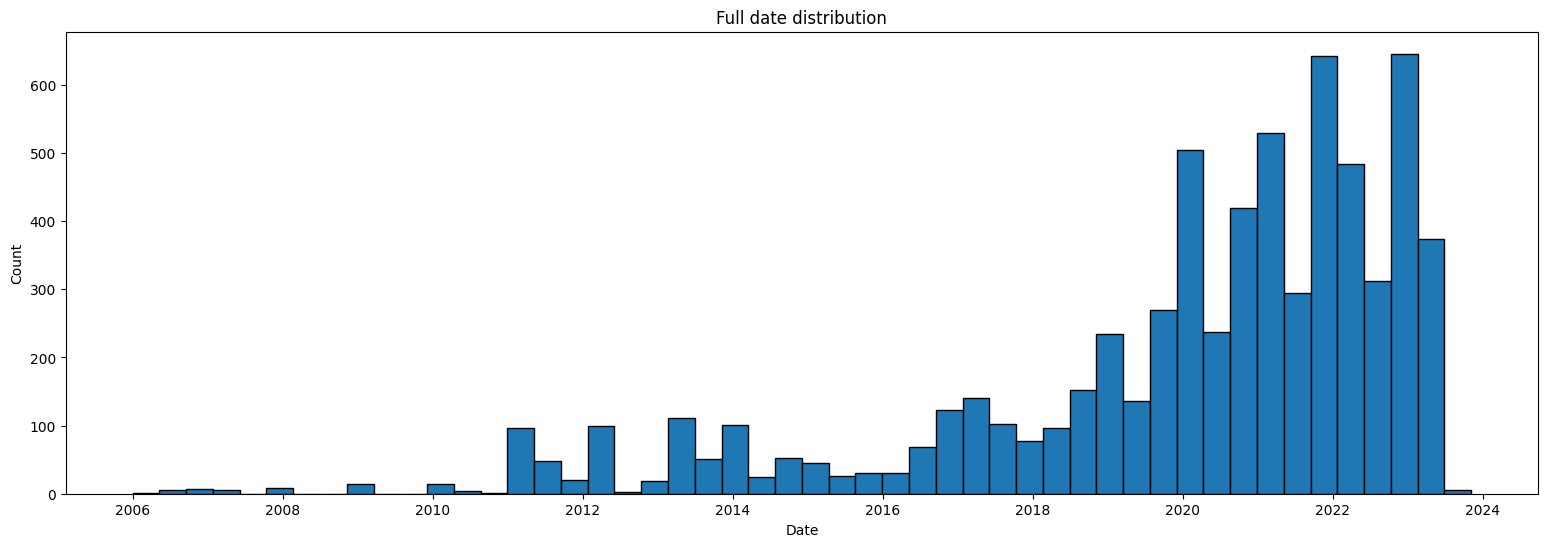

In [29]:
try:
    plt.figure(figsize=(19, 6))
    plt.hist(full_df["date"], bins=50, edgecolor="black")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.title("Full date distribution")
except:
    print("No date")

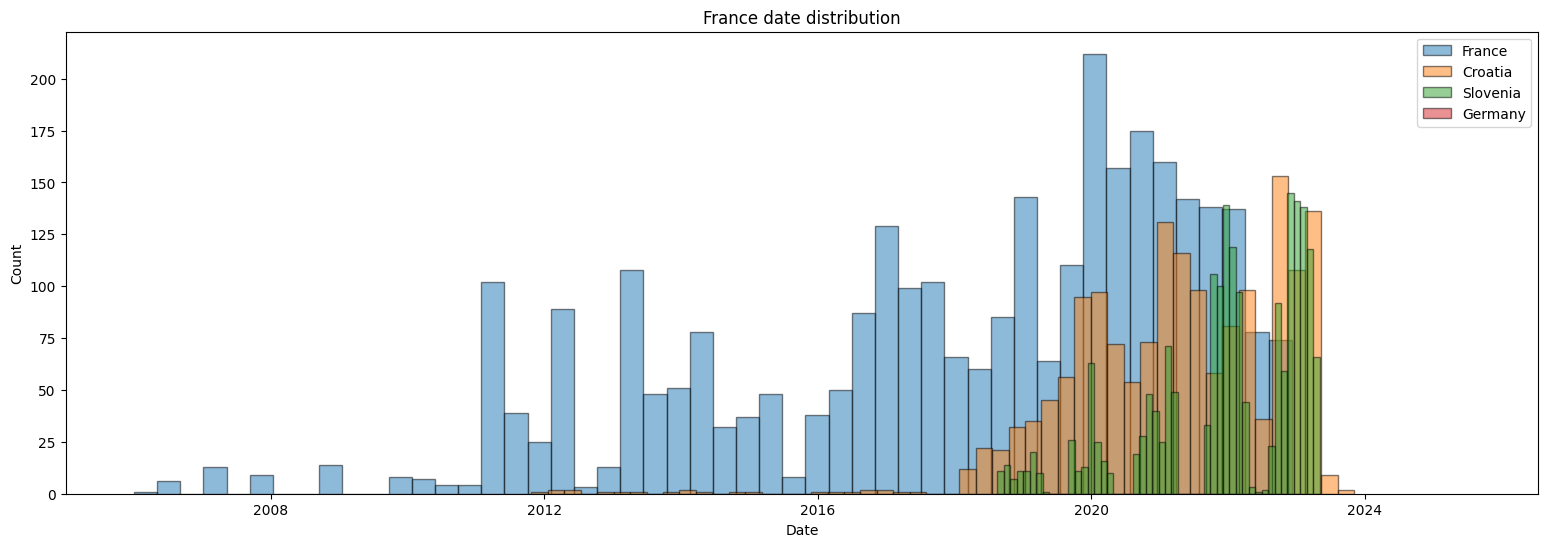

In [30]:
plt.figure(figsize=(19, 6))

for country in full_df['country'].unique():
    country_date = full_df[full_df['country'] == country]["date"]
    country_date = country_date.dropna()
    plt.hist(country_date, bins=50, alpha=0.5, edgecolor="black", label=country)

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("France date distribution")
plt.legend()

plt.xlim(np.datetime64('2005-01-01'))

plt.show()

## Image
### Image dimensions

In [31]:
batch_size = 32

dataloader = DataLoader(
    dataset=full_dataset,
    batch_size=batch_size,
    collate_fn=collate_single,
    shuffle=False,
    num_workers=8,
    prefetch_factor=2,
)

In [32]:
heights = []
widths = []
    
for i, batch in enumerate(tqdm(dataloader)):
    for img in batch[0]['image']:
        heights.append(img.shape[0])
        widths.append(img.shape[1])

100%|██████████| 370/370 [05:20<00:00,  1.15it/s]


In [33]:
full_df['img_height'] = heights
full_df['img_width'] = widths

In [34]:
average_width = sum(widths)/len(widths)
average_height = sum(heights)/len(heights)

print('Average width: {} and height: {}'.format(average_width, average_height))

Average width: 2682.169146238377 and height: 1876.1972950126797


### Distribution of image dimensions

Text(0.5, 1.0, 'Plot of image dimensions per country')

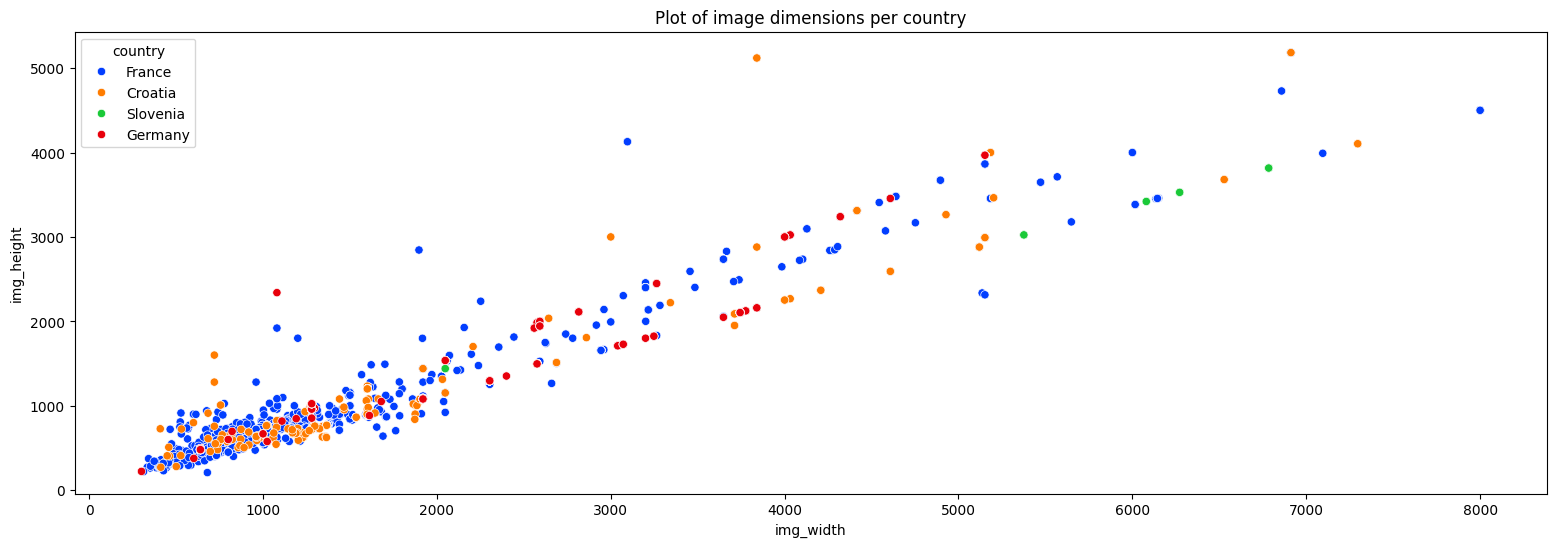

In [35]:
plt.figure(figsize=(19, 6))
sns.scatterplot(data=full_df, x='img_width', y='img_height', hue='country', alpha=1, palette='bright')
plt.title('Plot of image dimensions per country')

In [36]:
print(f"Lowest height : {min(heights)}")
print(f"Highest height : {max(heights)}")

print(f"Lowest width : {min(widths)}")
print(f"Highest widths : {max(widths)}")

Lowest height : 208
Highest height : 5184
Lowest width : 301
Highest widths : 8000


### Smallest images per country

In [37]:
full_df['total_dimension'] = full_df['img_width'] + full_df['img_height']

In [38]:
full_df.groupby('country').apply(lambda x: x.loc[x['total_dimension'].idxmin(), ['img_width', 'img_height']])

img_width  img_height
country                        
Croatia         412         271
France          313         220
Germany         301         222
Slovenia       1920        1080

### Largest images by country

In [39]:
full_df.groupby('country').apply(lambda x: x.loc[x['total_dimension'].idxmax(), ['img_width', 'img_height']])

img_width  img_height
country                        
Croatia        6912        5184
France         8000        4500
Germany        5152        3968
Slovenia       6784        3816

### Width and height distribution

Text(0.5, 1.0, 'Image height')

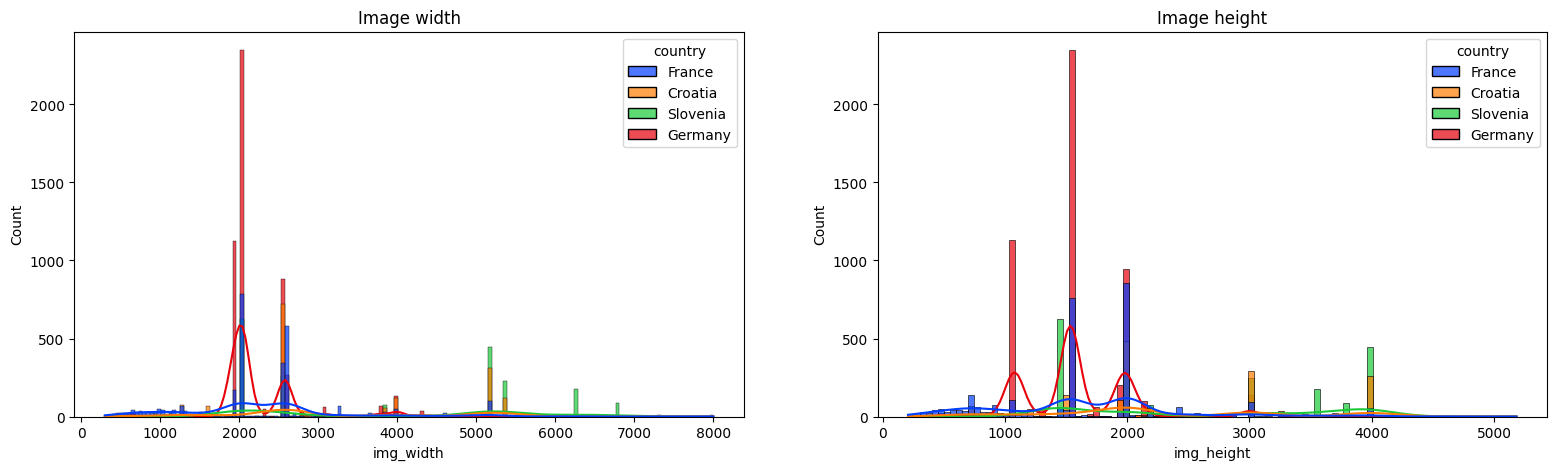

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(19, 5))

sns.histplot(data=full_df, kde=True, x='img_width', hue='country', alpha=0.7, palette='bright', ax=axes[0])
axes[0].set_title("Image width")

sns.histplot(data=full_df, kde=True, x='img_height', hue='country', alpha=0.7, palette='bright', ax=axes[1])
axes[1].set_title("Image height")

Text(0.5, 1.0, 'Image height')

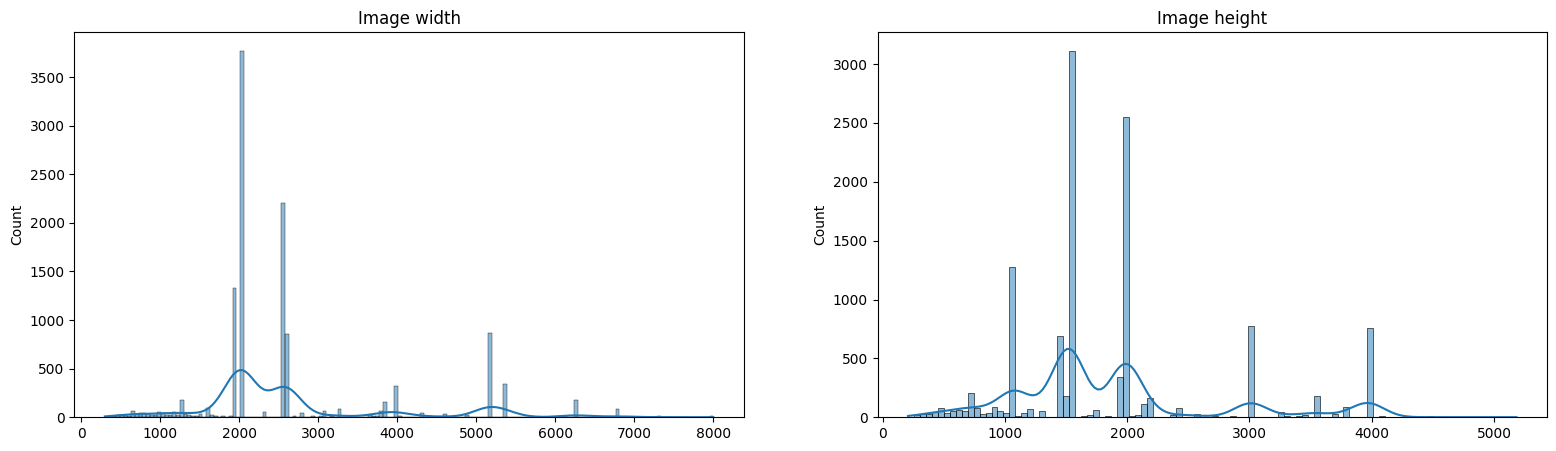

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(19, 5))

sns.histplot(widths, kde=True, ax=axes[0])
axes[0].set_title("Image width")
sns.histplot(heights, kde=True, ax=axes[1])
axes[1].set_title("Image height")

### Ratio distribution

In [42]:
full_df['ratio'] = full_df['img_width'] / full_df['img_height']

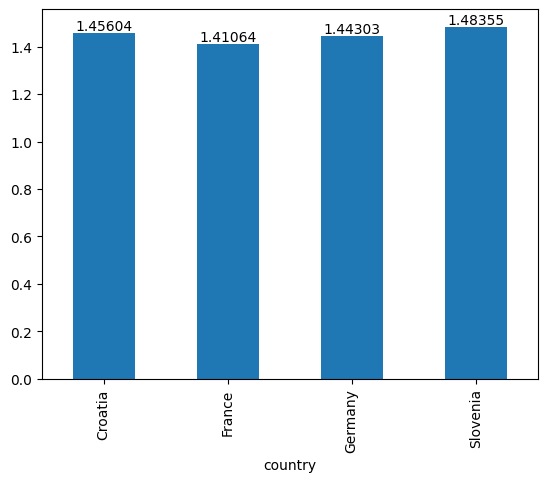

In [43]:
ax = full_df.groupby('country')['ratio'].mean().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

In [44]:
ratios = []
for height, width in zip(heights, widths):
    ratios.append(width/height)
        
print(f"Mean ratio: {np.mean(ratios)}")

Mean ratio: 1.443120111639496


Text(0.5, 1.0, 'Ratio distribution')

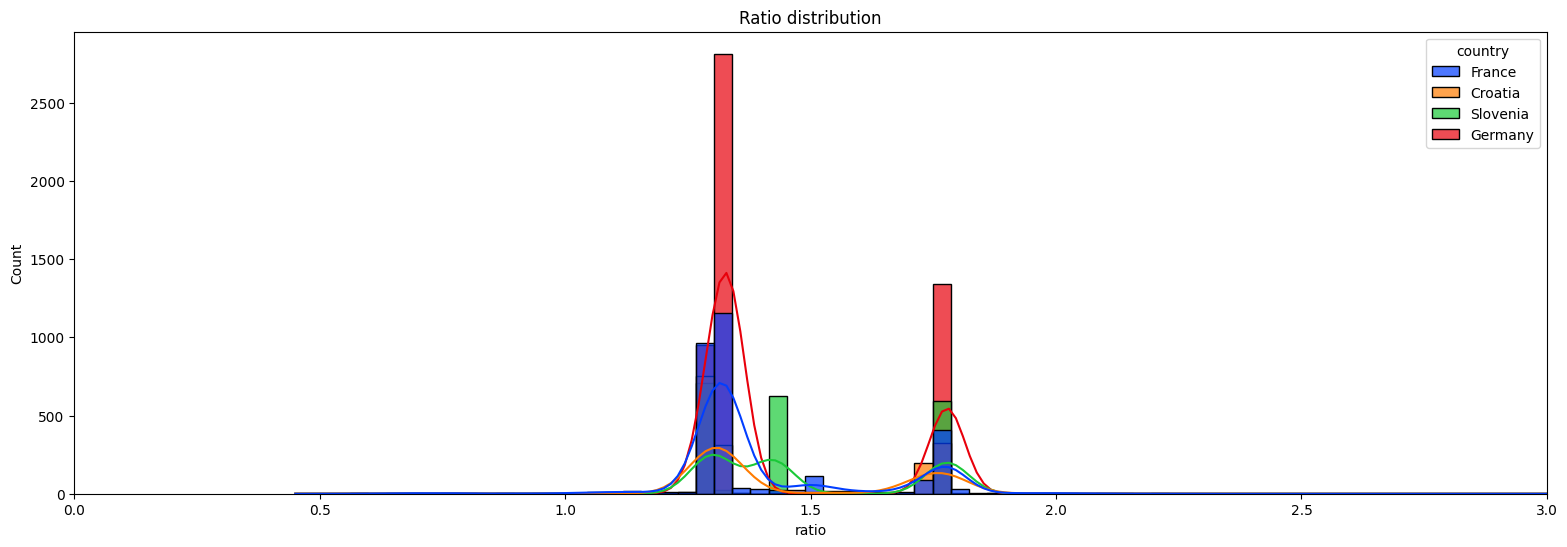

In [45]:
plt.figure(figsize=(19, 6))
sns.histplot(data=full_df, kde=True, x='ratio', hue='country', alpha=0.7, palette='bright')
plt.xlim(0,3)
plt.title("Ratio distribution")

### Image color (coloured or black and white image)

In [6]:
def is_black_and_white(img, threshold=10, show_score=False):
    diff_rg = np.abs(img[:, :, 0] - img[:, :, 1])
    diff_gb = np.abs(img[:, :, 1] - img[:, :, 2])
    diff_rb = np.abs(img[:, :, 0] - img[:, :, 2])
    
    avg_diff = (diff_rg + diff_gb + diff_rb) / 3
    
    if show_score:
        print(np.mean(avg_diff))
    
    is_bw = np.mean(avg_diff) < threshold
    
    return is_bw

In [8]:
batch_size = 64

dataloader = DataLoader(
    dataset=full_dataset,
    batch_size=batch_size,
    collate_fn=collate_single,
    shuffle=False,
    num_workers=4,
    prefetch_factor=2,
)

In [9]:
is_coloured = []

for i, batch in enumerate(tqdm(dataloader)):
    for img in batch[0]['image']:
        try:
            if is_black_and_white(img):
                is_coloured.append(False)
            else:
                is_coloured.append(True)
        except:
            print(f"Problem with image {i}")
            continue

100%|██████████| 185/185 [14:21<00:00,  4.65s/it]


In [10]:
full_df['is_coloured'] = is_coloured

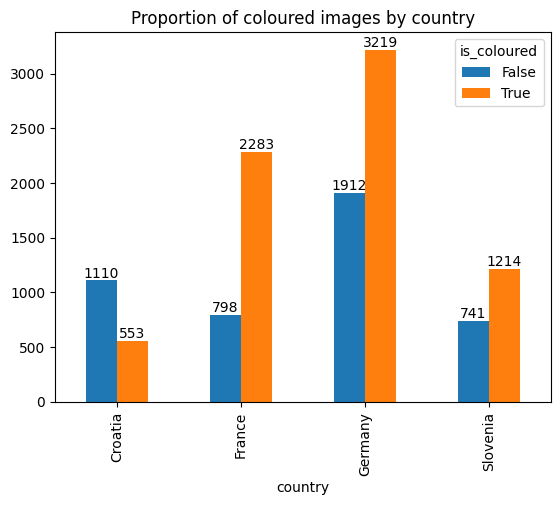

In [11]:
ax = full_df.groupby(['country', 'is_coloured']).size().unstack().plot(kind='bar', title='Proportion of coloured images by country')
for container in ax.containers:
    ax.bar_label(container)

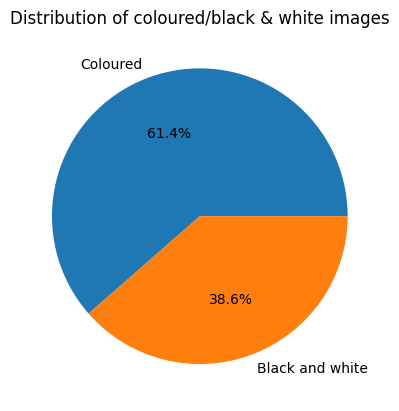

In [12]:
nb_coloured = is_coloured.count(True)
nb_bw = is_coloured.count(False)

plt.pie([nb_coloured, nb_bw], labels=['Coloured', 'Black and white'], autopct='%1.1f%%')
plt.title('Distribution of coloured/black & white images')
plt.show()